In [1]:
%load_ext autoreload
%autoreload 2

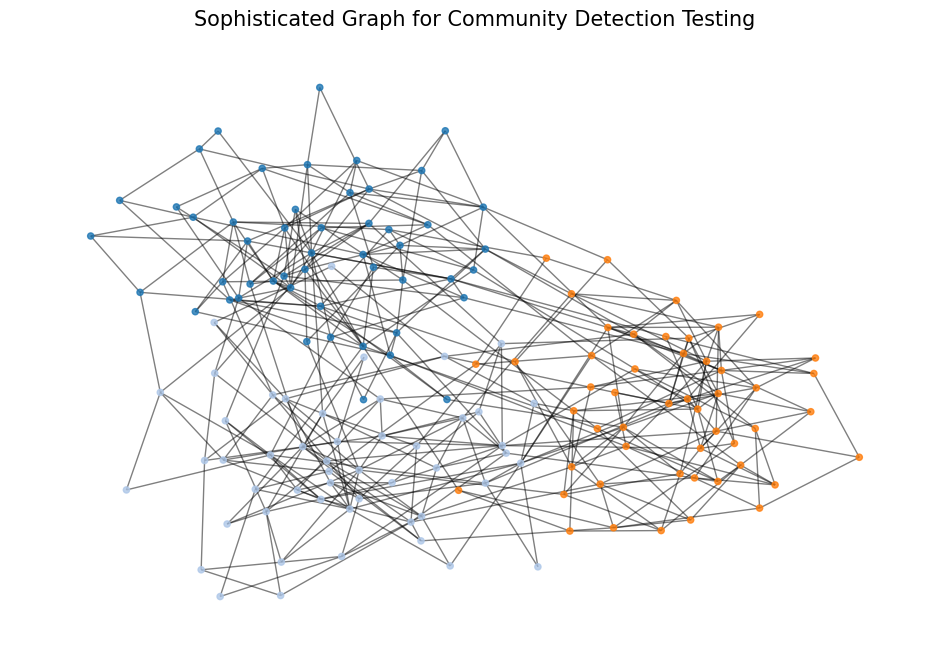

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# Define the number of communities and their sizes
num_communities = 3
community_sizes = [50, 50, 50]  # Four communities with 50 nodes each

# Define the probability of edges within and between communities
p_intra = 0.1  # Probability of edges within the same community
p_inter = 0.005  # Probability of edges between different communities

# Create the Stochastic Block Model
probs = [[p_intra if i == j else p_inter for j in range(num_communities)] for i in range(num_communities)]
G = nx.stochastic_block_model(community_sizes, probs, seed=42)

# Assign community labels to nodes for visualization
community_labels = []
for i, size in enumerate(community_sizes):
    community_labels += [i] * size

# Generate a color map based on community labels
colors = plt.cm.tab20.colors  # A colormap with enough distinct colors
node_colors = [colors[label % len(colors)] for label in community_labels]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.15)  # Positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Sophisticated Graph for Community Detection Testing", fontsize=15)
plt.axis('off')
plt.show()

In [3]:
# Function to convert NetworkX graph to custom Graph class
from leiden_cpm import Graph
from leiden_cpm import leiden

def convert_networkx_to_custom_graph(nx_graph):
    """
    Converts a NetworkX graph to a custom Graph class instance.

    Parameters:
    - nx_graph (networkx.Graph): The NetworkX graph to convert.

    Returns:
    - Graph: An instance of the custom Graph class with the same structure.
    """
    custom_graph = Graph()

    # Add all edges to the custom graph
    for u, v, data in nx_graph.edges(data=True):
        # If the NetworkX graph has weights, use them; otherwise, default to 1
        weight = data.get('weight', 1)
        custom_graph.add_edge(u, v, weight)

    # Optionally, ensure all nodes are added (even isolated nodes)
    for node in nx_graph.nodes():
        if node not in custom_graph.adj:
            custom_graph.adj[node]  # This will initialize the set for the node

    return custom_graph


In [11]:
# Convert the NetworkX graph to the custom Graph class
g = convert_networkx_to_custom_graph(G)

# Function to run Leiden algorithm and return number of communities
def run_leiden(gamma):
    communities = leiden(g, gamma=gamma, verbose=False)
    print(f'Number of communities detected: {len(communities)}')
    return len(communities)

# Binary search to find gamma that yields approximately 4 communities
target = 4
low, high = 0.1, 10.0
epsilon = 1e-6

while high - low > epsilon:
    mid = (low + high) / 2
    num_communities = run_leiden(mid)
    
    if num_communities < target:
        low = mid # gamma is too high
    elif num_communities > target:
        high = mid # gamma is too low
    else:
        break

# Run the Leiden algorithm with the found gamma
final_gamma = (low + high) / 2
communities = leiden(g, gamma=final_gamma, verbose=False)

# Print the detected communities
print(f'Gamma used: {final_gamma}')
print(f'Number of communities detected: {len(communities)}')
print("Detected communities:", communities)


--------------------------------
LEVEL  1 
--------------------------------
Community metrics:  {0: 0, 2: 0, 8: 0, 10: 0, 13: 0, 20: 0, 27: 0, 28: 0, 42: 0, 45: 0, 1: 0, 41: 0, 47: 0, 56: 0, 6: 0, 30: 0, 32: 0, 37: 0, 40: 0, 61: 0, 113: 0, 3: 0, 25: 0, 36: 0, 43: 0, 4: 0, 12: 0, 22: 0, 39: 0, 5: 0, 23: 0, 71: 0, 87: 0, 15: 0, 18: 0, 26: 0, 7: 0, 147: 0, 52: 0, 9: 0, 11: 0, 24: 0, 93: 0, 35: 0, 106: 0, 21: 0, 29: 0, 46: 0, 19: 0, 34: 0, 67: 0, 38: 0, 44: 0, 14: 0, 16: 0, 17: 0, 49: 0, 48: 0, 89: 0, 128: 0, 115: 0, 33: 0, 31: 0, 75: 0, 108: 0, 140: 0, 88: 0, 137: 0, 123: 0, 77: 0, 127: 0, 145: 0, 85: 0, 142: 0, 114: 0, 124: 0, 117: 0, 50: 0, 54: 0, 73: 0, 74: 0, 51: 0, 72: 0, 90: 0, 99: 0, 53: 0, 60: 0, 69: 0, 81: 0, 98: 0, 57: 0, 59: 0, 84: 0, 96: 0, 125: 0, 55: 0, 68: 0, 58: 0, 63: 0, 76: 0, 82: 0, 86: 0, 62: 0, 79: 0, 94: 0, 92: 0, 139: 0, 120: 0, 101: 0, 66: 0, 83: 0, 64: 0, 65: 0, 91: 0, 97: 0, 70: 0, 121: 0, 80: 0, 129: 0, 95: 0, 126: 0, 78: 0, 138: 0, 144: 0, 112: 0, 100: 0, 105: 